# Multiple Linear Regression
## Bike Sharing Company

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.The company has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.The company wants to understand the factors affecting the demand for these shared bikes in the American market.

 The company wants to know:

    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands



## Step 1: Reading and Understanding the Data

Let us first import required packages

In [496]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [497]:
#read the data from the csv
bikesharingdays = pd.read_csv("day.csv")

In [498]:
# Check the glimps of the dataset
bikesharingdays.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Now lets review the various aspects of the bike sharing dataframe

In [499]:
bikesharingdays.shape

(730, 16)

In [500]:
bikesharingdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [501]:
#As we see above that the data has no null values, therefore we do not need to handel nulls here

In [502]:
bikesharingdays.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Dropping very obivious irrelevant columns

- The 'instant' column is identity column and will not have any real significance in the model.
- The dteday column is irrelevant as the date columns do not contribute in model. Moreover the data contained in this column is addressed in other columns already, which are 'yr', 'mnth'.The day part of the column is addressed collectively by holiday and workingday (and with both these two we can know inference about the weekend as well).So there is absolutely no harm in dropping "dteday" column as doing that doesn't do any data loss as per business objective.
- Dropping 'casual' and 'registered' columns is required as these are the bifercation of total count captured in the 'cnt' column ('casual' bikers plus 'registered' bikers), which is the target prediction column. Therefore we keep the 'cnt' column in the database and drop 'casual' and 'registered' columns. 
     - 

In [503]:
#Remove instant column
bikesharingdays.drop(['instant'], axis = 1, inplace = True)
#Remove dteday column
bikesharingdays.drop(['dteday'], axis = 1, inplace = True)
#Remove casual and registered column
bikesharingdays.drop(['casual'], axis = 1, inplace = True)
bikesharingdays.drop(['registered'], axis = 1, inplace = True)
#Let's take a glimps of the dataframe again
bikesharingdays.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

We now try to understand the data to get a sense of:
- Any obivious multicollinearity
- Association of predictors with target


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

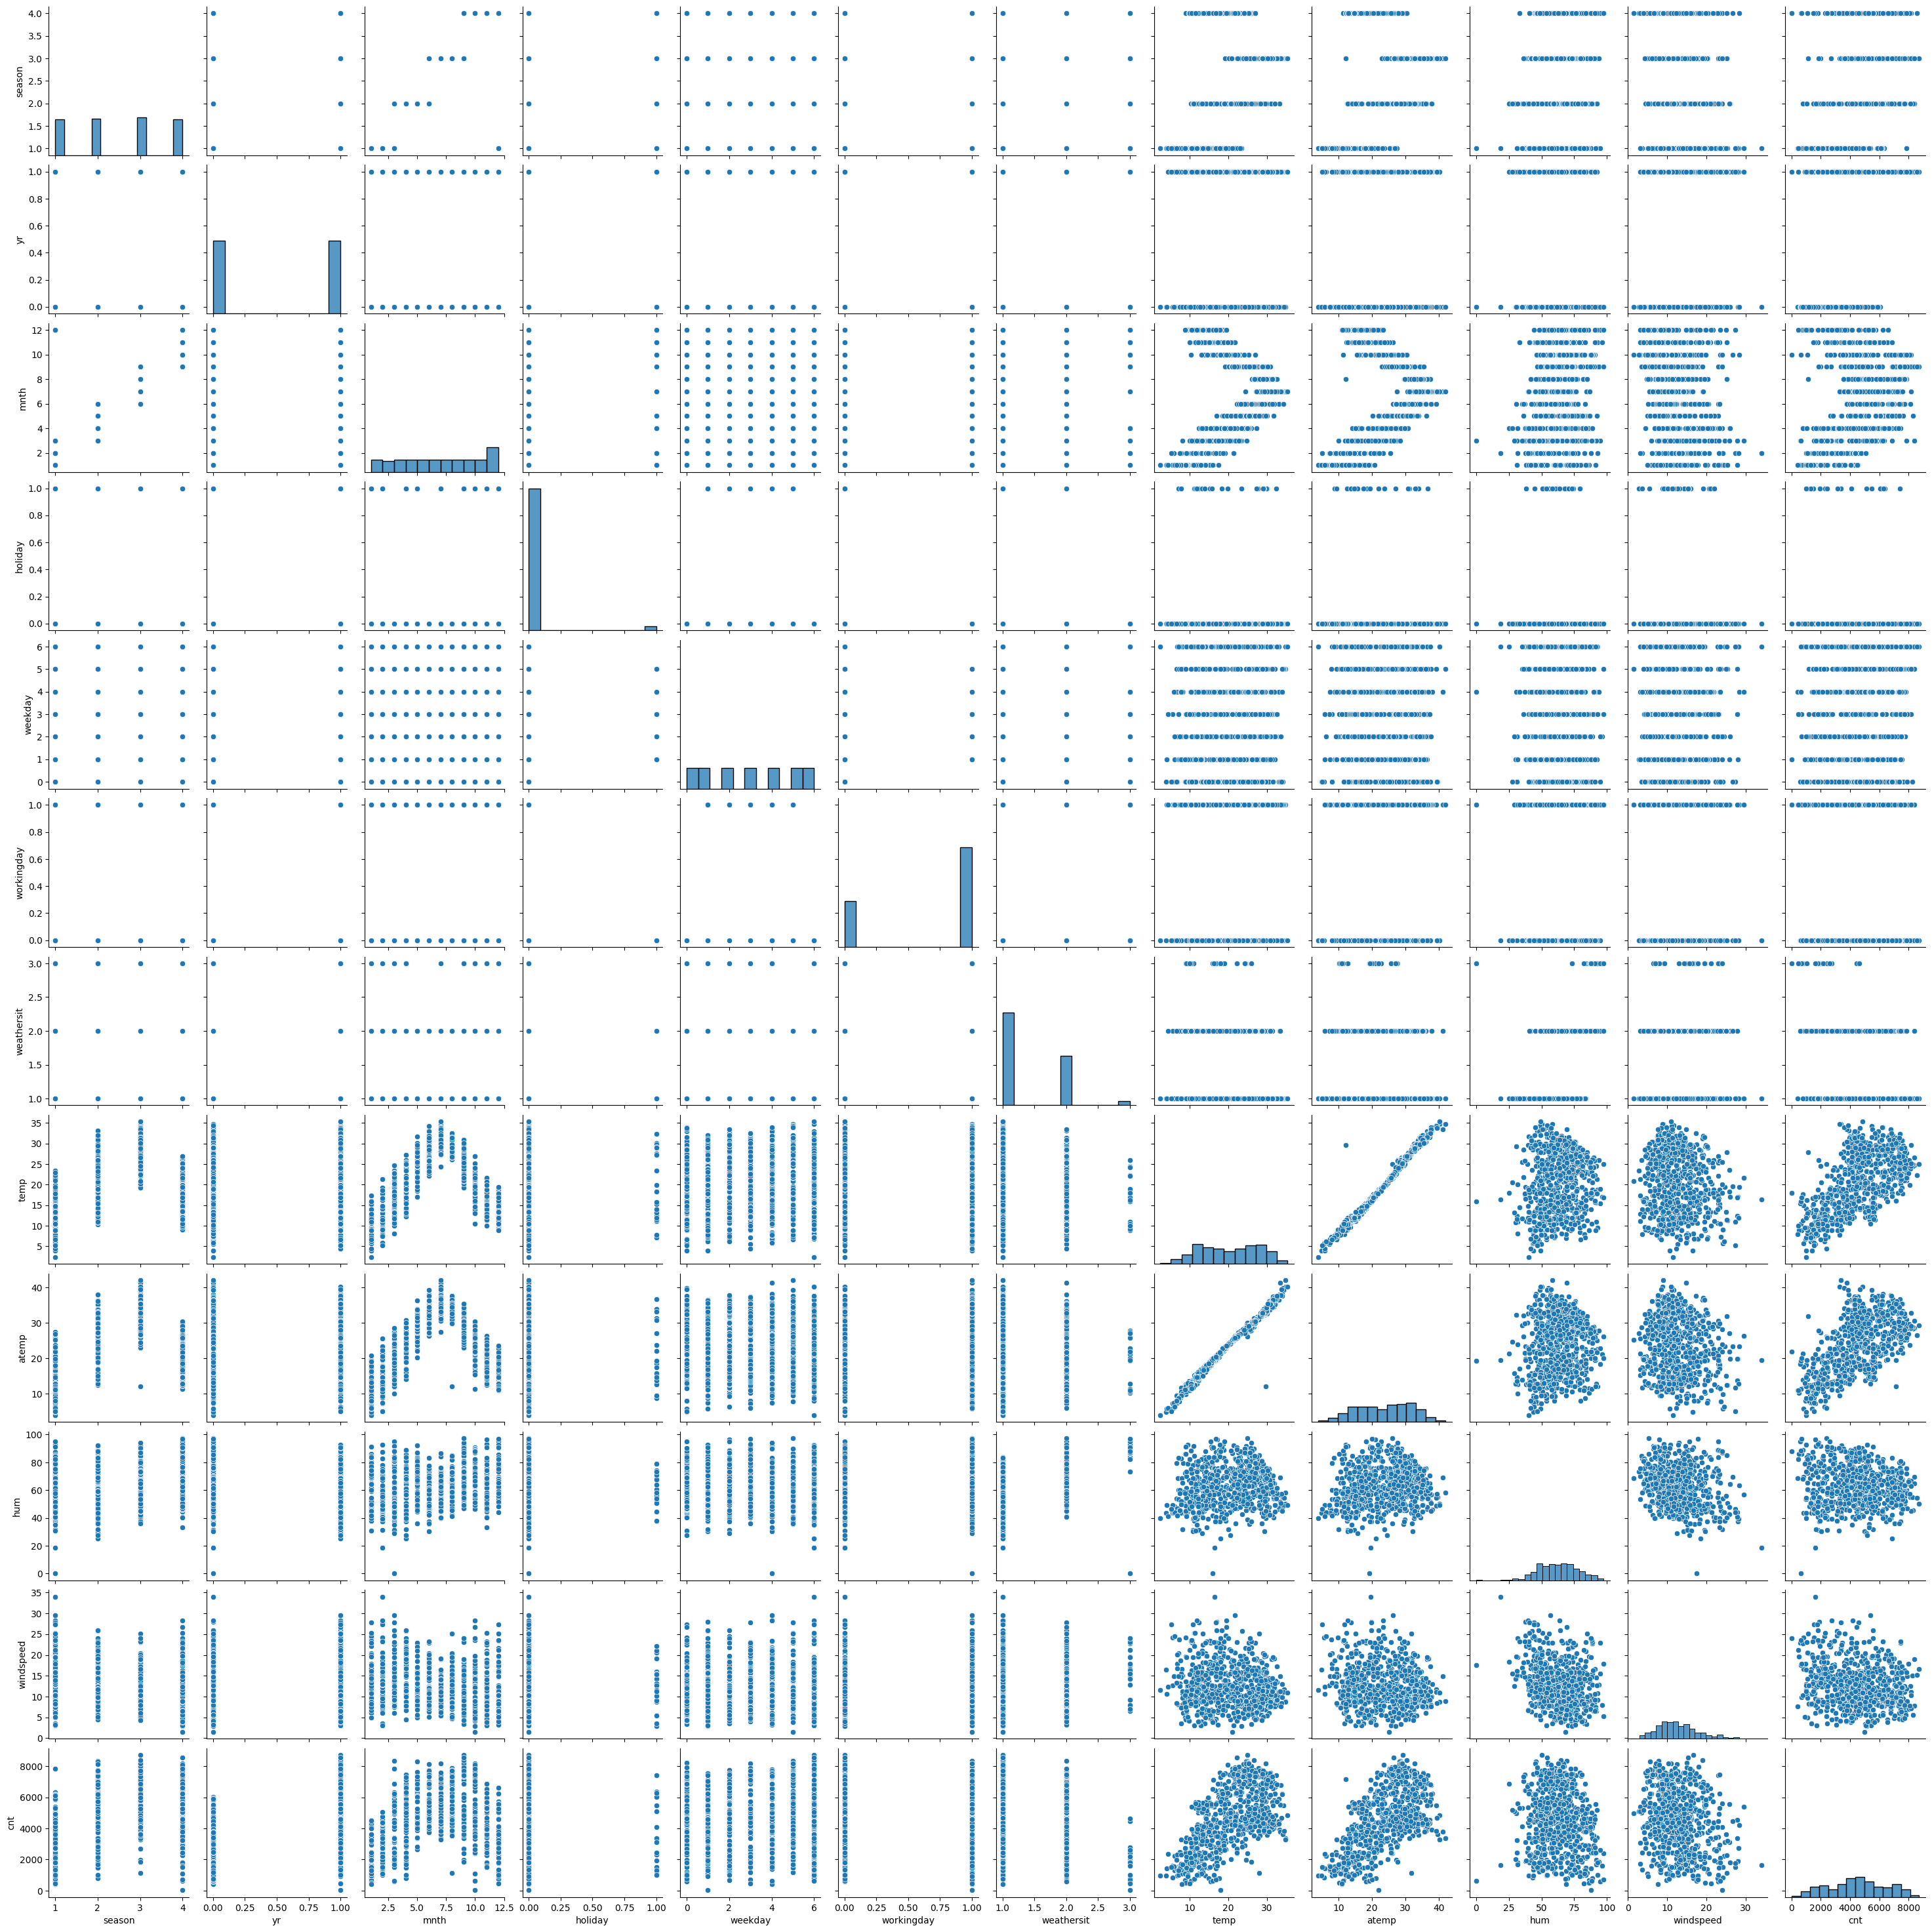

In [504]:
sns.pairplot(bikesharingdays)
plt.show()

### Lets see what we found with above charts and decide next steps
- From above plots we see that there is very strong multicollinearity between temp and atemp
- Also 'atemp' and 'temp' look good predictor for 'cnt' as they have higher correlation with 'cnt' than other  variables.
- There is not much to know beyond this with the current dataset and above charts.


**As there are a few predictors which are categorical, so lets create dummy columns for them. However before creating dummy columns it is better to give some meaningful names to the numeric values of these categorical variable. But before doing that we will look and these categorical variables and infer their impact of the target variable, which is total number of bikers ('cnt').**
 

#### Visualising Categorical Variables

There are a few categorical variables as well. Let's make a boxplot for some of these variables.

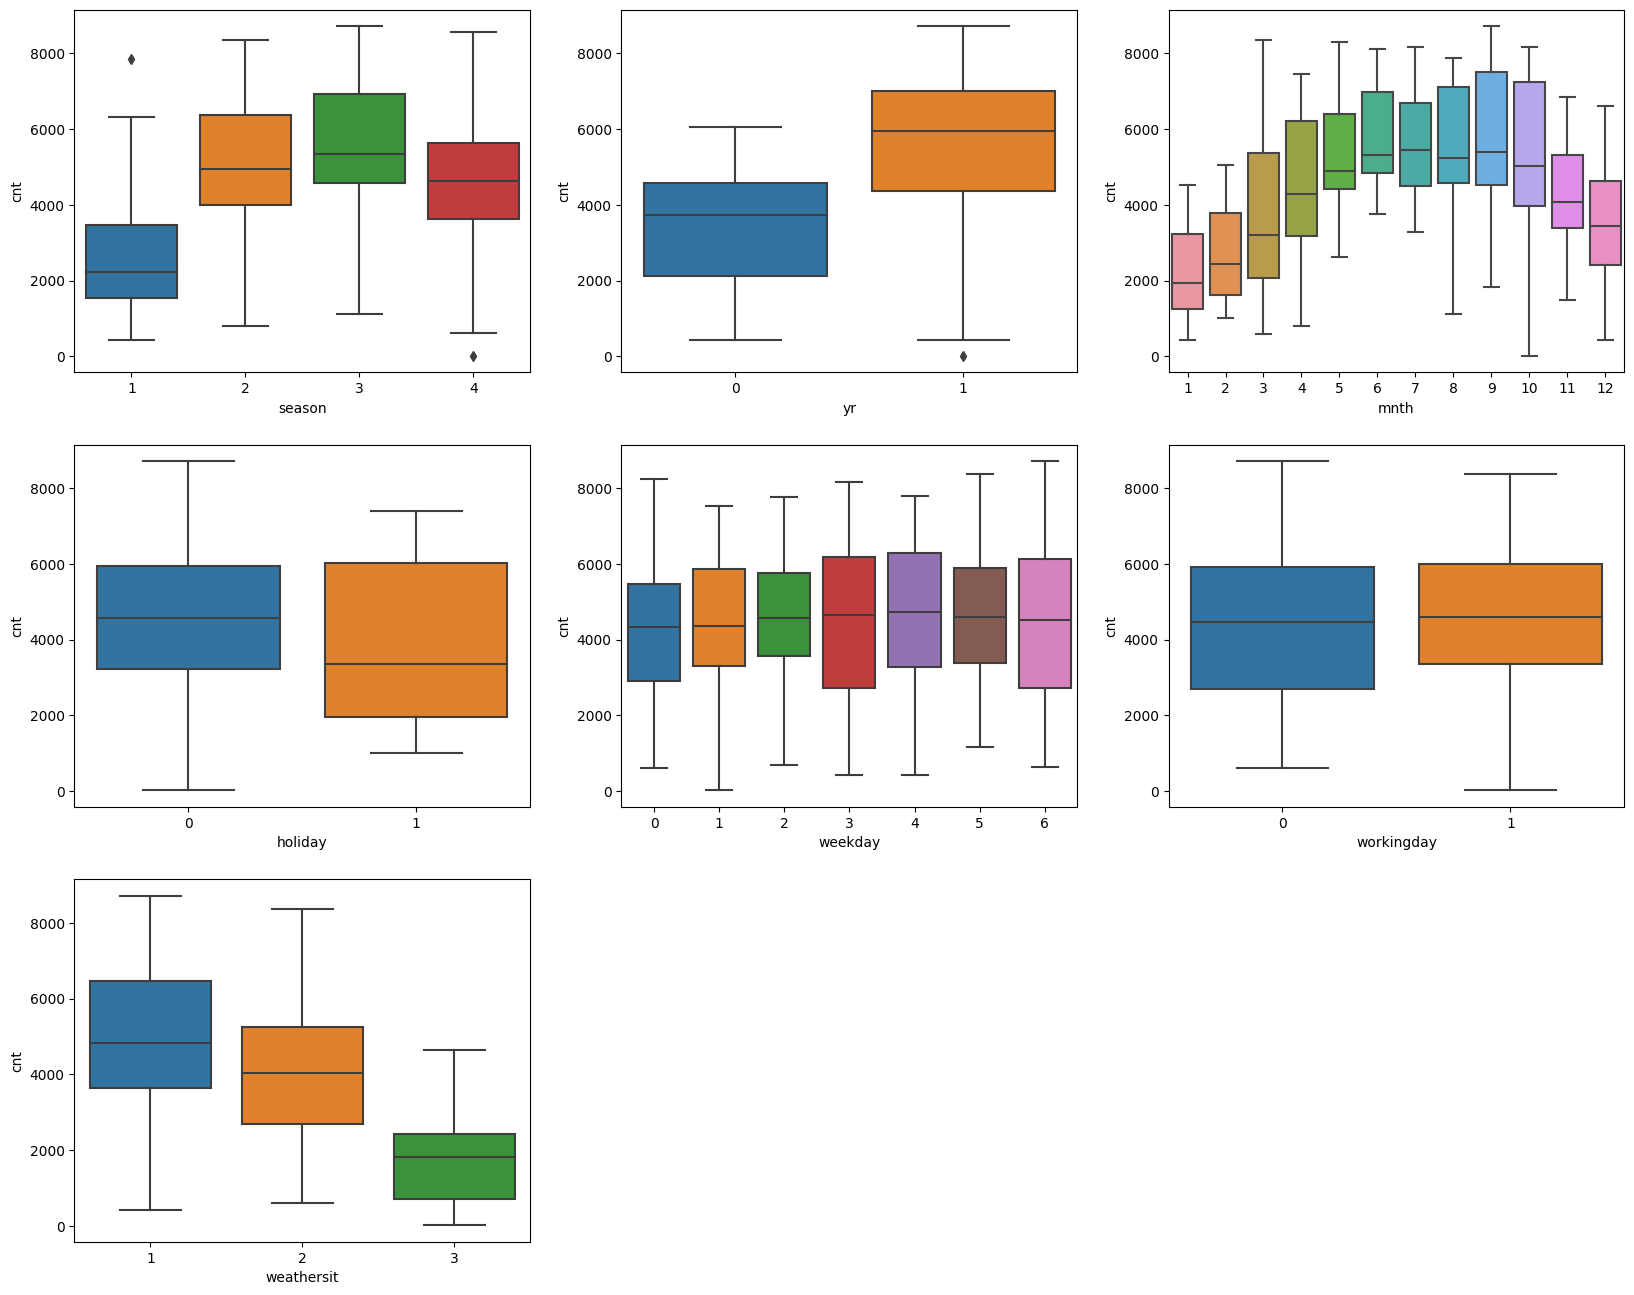

In [505]:
plt.figure(figsize=(20, 16))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharingdays)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharingdays)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharingdays)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharingdays)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharingdays)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharingdays)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharingdays)
plt.show()

#### From above plots, it seems except weekday all other categorical predictors have significance on bike counts. Let's look at the varables and their significance on target variable (which is total number of bikers):

- **Season**: Spring has lowest average bikers count and lowest 25th and 75th percentile, whereas fall has highest average bikers count which however is close to average bikers count in summer and winter. The winter average bikers count is a little lower than bikers count in summer.
- **Yr**: Year 2019 has more average bikers count.  Even the 75th percentile of bikers count in the year 2018 is just a little higher that 25th percentile of bikers count in the year 2019.
- **mnth**: The average bikers count is lowest in the month of January and highest during the months of June, July and August. The average bikers count increases every month from January until July, thereafter which it starts decreasing till December.   
- **holiday**: Holidays have lower average bikers count than oth days. However the 75th percentile is little higher on holidays which could be because of on some holidays people go out for shopping and meet friends and family in larger number than on regular days.
- **weekday**: The weekdays have almost same average counts of bikers across all days with 25th percentile is lowest on Sunday. Which looks obivious as on Sunday people mostly remain at home.
- **workingday**: Working days have higher bikers count than non-working days. However the 75th percentile of bikers on working and non-working days are almost the same.
- **weathersit**: The “Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog” weather has lowest overall bikers count and “Clear, Few clouds, Partly cloudy, Partly cloudy” weather has highest overall bikers count. This is obivious as in “Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog” ,  no one would want to go out on bikes unless in urgent and unavoidable requirements while “ Clear, Few clouds, Partly cloudy, Partly cloudy” is good for get a bike ride. Meanwhile  bikers in “Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist” are 3rd highest and “Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds” have 3rd highest bikers count.

Let's continue further...

## Step 3: Data Preparation

### Set meaningful values for categorical columns:

##### The categorical columns are:
- mnth
- yr
- season
- weekday
- weathersit

***As these are integer columns, we first update the datatype to string and after that we will set string values to these columns:***

In [506]:
#Convert datatype to string of original columns
bikesharingdays['mnth'] = bikesharingdays['mnth'].astype(str)
bikesharingdays['yr'] = bikesharingdays['yr'].astype(str)
bikesharingdays['season'] = bikesharingdays['season'].astype(str)
bikesharingdays['weekday'] = bikesharingdays['weekday'].astype(str)
bikesharingdays['weathersit'] = bikesharingdays['weathersit'].astype(str)
#bikesharingdays.head()
#bikesharingdays.info()
#Now we set string values for these columns as per dictionary:
#For mnth:
mnth_mappings =  {'1': 'Jan', '2': 'Feb', '3': 'March', '4': 'April', '5': 'May', '6': 'June', '7': 'July', '8': 'Aug', '9': 'Sept', '10': 'Oct', '11': 'Nov', '12': 'Dec'}
bikesharingdays['mnth'] = bikesharingdays['mnth'].map(mnth_mappings)
#For yr:
yr_mappings = {'0': '2018','1':'2019'}
bikesharingdays['yr'] = bikesharingdays['yr'].map(yr_mappings)
#For season
season_mappings = {'1':'spring','2':'summer','3':'fall','4':'winter'}
bikesharingdays['season'] = bikesharingdays['season'].map(season_mappings)

#For weekday
weekday_mappings =  {'0': 'Mon', '1': 'Tue', '2': 'Wed', '3': 'Thu', '4': 'Fri', '5': 'Sat', '6': 'Sun'}
bikesharingdays['weekday'] = bikesharingdays['weekday'].map(weekday_mappings)
#For weathersit
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#here we are giving code words to the weathers

weathersit_mappings = {'1':'ClearFCPC','2':'MistCRTSCLR','3':'LightSnowLRTSCLR','4':'HeavyRainIPTMSF'}
bikesharingdays['weathersit'] = bikesharingdays['weathersit'].map(weathersit_mappings)

#workingday and holiday are boolean columns so we do not to do anything with them at this stage
bikesharingdays.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sun,0,MistCRTSCLR,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Mon,0,MistCRTSCLR,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Tue,1,ClearFCPC,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Wed,1,ClearFCPC,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Thu,1,ClearFCPC,9.305237,11.46350,43.6957,12.522300,1600


### Create Dummy Columns
##### Now we create dummy columns for categorical variables:

In [507]:

# For mnth

months = pd.get_dummies(bikesharingdays['mnth'], drop_first = True)
# Concat the results to the original bikesharingdays dataframe
bikesharingdays = pd.concat([bikesharingdays, months], axis = 1)
# For yr

years = pd.get_dummies(bikesharingdays['yr'], drop_first = True)
# Concat the results to the original bikesharingdays dataframe
bikesharingdays = pd.concat([bikesharingdays, years], axis = 1)

# For season

seasons = pd.get_dummies(bikesharingdays['season'], drop_first = True)
# Concat the results to the original bikesharingdays dataframe
bikesharingdays = pd.concat([bikesharingdays, seasons], axis = 1)

# For weekday

weekdays = pd.get_dummies(bikesharingdays['weekday'], drop_first = True)
# Concat the results to the original bikesharingdays dataframe
bikesharingdays = pd.concat([bikesharingdays, weekdays], axis = 1)

# For weathersit

weathersits = pd.get_dummies(bikesharingdays['weathersit'], drop_first = True)
# Concat the results to the original bikesharingdays dataframe
bikesharingdays = pd.concat([bikesharingdays, weathersits], axis = 1)

bikesharingdays.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,LightSnowLRTSCLR,MistCRTSCLR
0,spring,2018,Jan,0,Sun,0,MistCRTSCLR,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,1
1,spring,2018,Jan,0,Mon,0,MistCRTSCLR,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,1
2,spring,2018,Jan,0,Tue,1,ClearFCPC,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,0,0
3,spring,2018,Jan,0,Wed,1,ClearFCPC,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,0,Thu,1,ClearFCPC,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,0,0


##### We do not need mnth,yr,season,weekday,weathersit columns anymore as we have created dummy columns for them,so we remove the redundancy by drop these:


In [508]:
bikesharingdays.drop(['mnth'], axis = 1, inplace = True)
bikesharingdays.drop(['yr'], axis = 1, inplace = True)
bikesharingdays.drop(['season'], axis = 1, inplace = True)
bikesharingdays.drop(['weekday'], axis = 1, inplace = True)
bikesharingdays.drop(['weathersit'], axis = 1, inplace = True)
bikesharingdays.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,LightSnowLRTSCLR,MistCRTSCLR
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets and Rescaling the training set

In [509]:
np.random.seed(0)
df_train, df_test = train_test_split(bikesharingdays, train_size = 0.7, test_size = 0.3, random_state = 100)

In [510]:
df_train.shape

(510, 30)

In [511]:
df_test.shape

(219, 30)

### Rescaling the Features 

We will use MinMax scaling.

In [512]:
scaler = MinMaxScaler()

In [513]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
nondummy_nonbool_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[nondummy_nonbool_vars] = scaler.fit_transform(df_train[nondummy_nonbool_vars])

In [514]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,LightSnowLRTSCLR,MistCRTSCLR
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,...,0,1,0,0,0,0,0,1,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,0,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [515]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,LightSnowLRTSCLR,MistCRTSCLR
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,...,0.245098,0.24902,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.343137
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,...,0.430568,0.43287,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Visualise correlations:

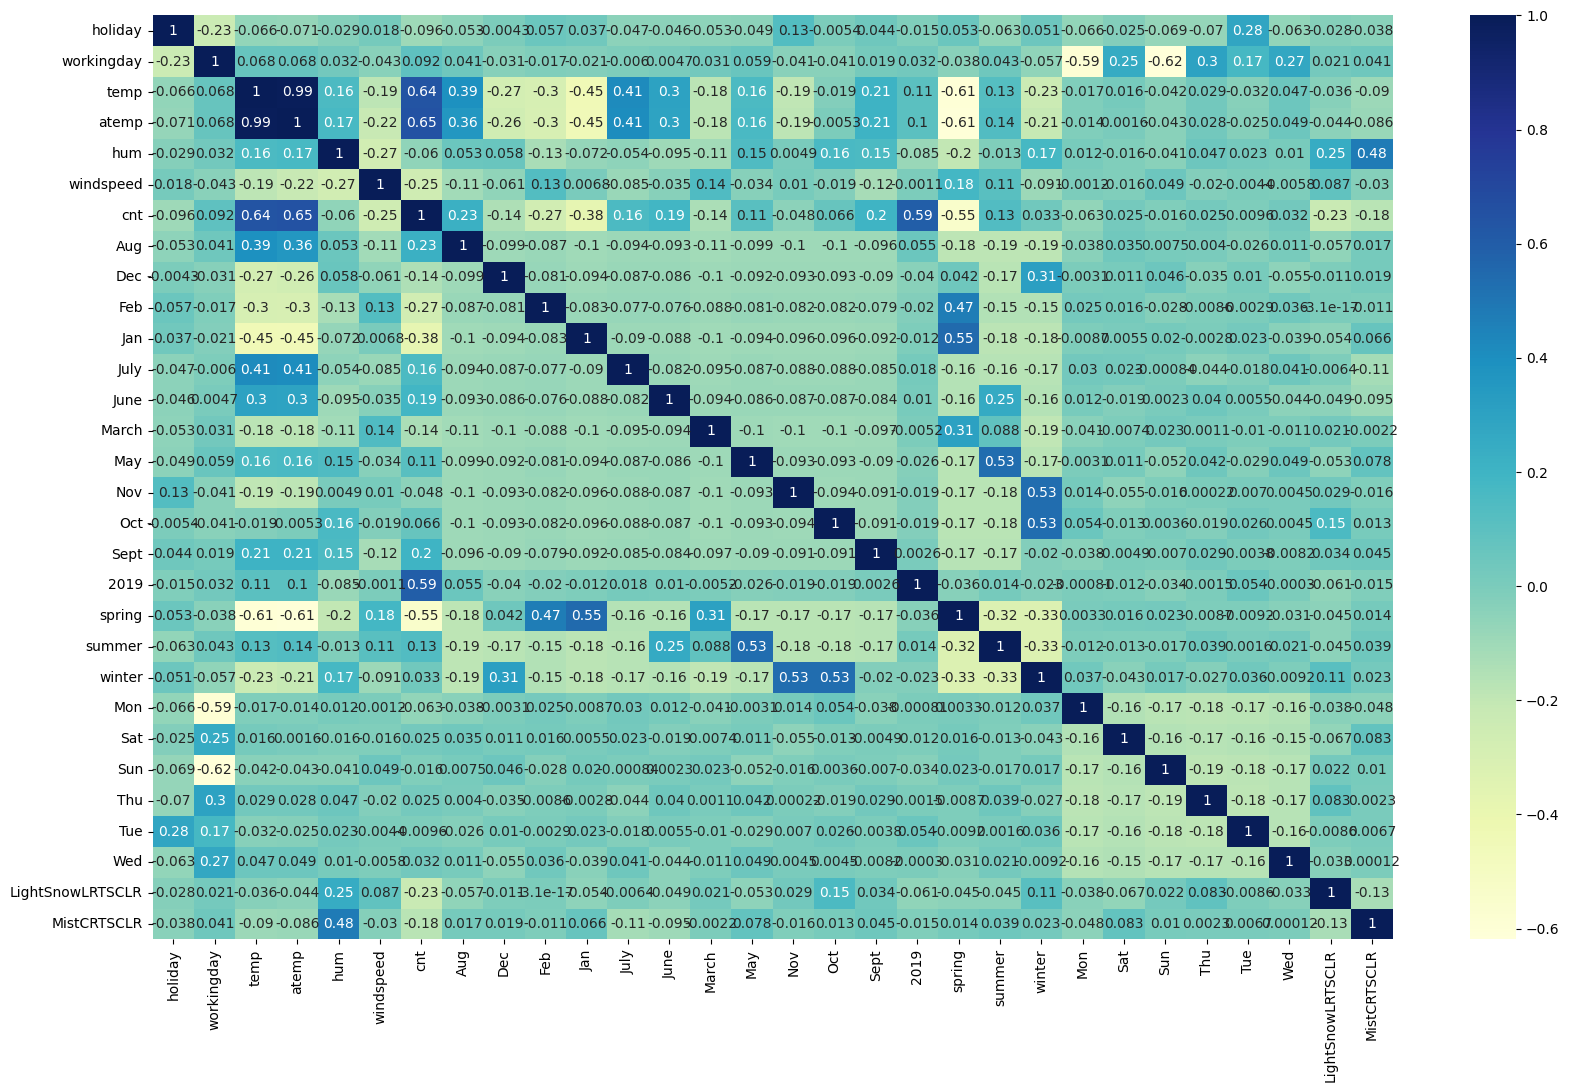

In [516]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

###### with above heat map we can see which predictors have good correlation with 'cnt' . We see approx 10 predictors seem to have some considerable correlation with 'cnt'. So we will use 10 columns for RFE later below.

#### Now we divide train data into X and Y sets for the model building:

In [517]:
y_train = df_train.pop('cnt')
X_train = df_train

In [518]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [519]:
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,Aug,Dec,Feb,Jan,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,LightSnowLRTSCLR,MistCRTSCLR
653,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


## Step 5: Building our model

### RFE
We will start with Recursive feature elimination, to remove get significant features only

In [520]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
no_features = 15
rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [521]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 8),
 ('Feb', False, 10),
 ('Jan', False, 7),
 ('July', False, 3),
 ('June', False, 20),
 ('March', False, 19),
 ('May', False, 11),
 ('Nov', False, 9),
 ('Oct', False, 17),
 ('Sept', False, 5),
 ('2019', True, 1),
 ('spring', False, 2),
 ('summer', False, 12),
 ('winter', False, 6),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', True, 1),
 ('Thu', False, 18),
 ('Tue', False, 14),
 ('Wed', False, 15),
 ('LightSnowLRTSCLR', True, 1),
 ('MistCRTSCLR', False, 4)]

In [522]:
#Lets get these 10 predictors
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', '2019',
       'Mon', 'Sun', 'LightSnowLRTSCLR'],
      dtype='object')

In [523]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov',
       'Oct', 'Sept', 'spring', 'summer', 'winter', 'Sat', 'Thu', 'Tue', 'Wed',
       'MistCRTSCLR'],
      dtype='object')

In [524]:
# Let's X_test dataframe with 10 predictors selected using RFE
X_train_rfe = X_train[col]

In [525]:
#Add constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [526]:
# Run the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [527]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     174.4
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          5.05e-148
Time:                        07:30:53   Log-Likelihood:                 400.71
No. Observations:                 510   AIC:                            -781.4
Df Residuals:                     500   BIC:                            -739.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2073      0.025  

#### From the summary we observe followings:
- R squared and Adjusted R squared is decently good
- Adjusted R squared is almost sameas R squared. Which is good.
- p value of holiday having considerable high value. 

#### We remove holiday column which has high p value and recreate the model with remaining variables:

In [528]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [529]:
#add constant
X_train_lm = sm.add_constant(X_train_new)

In [530]:
# Run the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

In [531]:
#Let's see the summary again
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     174.4
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          5.05e-148
Time:                        07:30:55   Log-Likelihood:                 400.71
No. Observations:                 510   AIC:                            -781.4
Df Residuals:                     500   BIC:                            -739.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2060      0.043  

#### We still see the temp column has high p value while R squared is same, lets drop 'temp' also and recreate the model again: 

In [532]:
X_train_new = X_train_rfe.drop(["temp",'holiday'], axis = 1)

In [533]:
#add constant
X_train_lm = sm.add_constant(X_train_new)

In [534]:
# Run the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

In [535]:
#Let's see the summary again
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     195.2
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          1.30e-148
Time:                        07:30:57   Log-Likelihood:                 399.37
No. Observations:                 510   AIC:                            -780.7
Df Residuals:                     501   BIC:                            -742.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2050      0.043  

#### This time we remove 'Mon' also as it has got high p value, and do the create model again

In [536]:
X_train_new = X_train_rfe.drop(["temp",'holiday','Mon'], axis = 1)

In [537]:
#add constant
X_train_lm = sm.add_constant(X_train_new)

In [538]:
# Run the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

In [539]:
#Let's see the summary again
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     222.7
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          1.73e-149
Time:                        07:30:58   Log-Likelihood:                 398.63
No. Observations:                 510   AIC:                            -781.3
Df Residuals:                     502   BIC:                            -747.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2381      0.033  

#### Now the R squared and p value both are good. Now we will cross verify the correlations with help of VIF:

In [540]:
X_train_new.columns

Index(['const', 'workingday', 'atemp', 'hum', 'windspeed', '2019', 'Sun',
       'LightSnowLRTSCLR'],
      dtype='object')

In [541]:
#Drop const from the columns list
X_train_new = X_train_new.drop(['const'], axis=1)

In [542]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.09
1,atemp,6.79
0,workingday,4.52
3,windspeed,3.59
4,2019,2.02
5,Sun,1.79
6,LightSnowLRTSCLR,1.08


In [543]:
X_train_new.head()

,workingday,atemp,hum,windspeed,2019,Sun,LightSnowLRTSCLR
653,1,0.501133,0.575354,0.300794,1,0,0
576,1,0.766351,0.725633,0.264686,1,0,0
426,0,0.438975,0.640189,0.255342,1,1,0
728,0,0.200348,0.498067,0.663106,1,0,0
482,0,0.391735,0.504508,0.188475,1,1,0


#### We see now hight vif for hum, which means it is too significant to consider, having R squared about .90. We drop 'hum' also and recreate model:

In [544]:
X_train_new = X_train_rfe.drop(["temp",'holiday','Mon','hum'], axis = 1)

In [545]:
#add constant
X_train_lm = sm.add_constant(X_train_new)

In [546]:
# Run the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

In [547]:
#Let's see the summary again
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     243.9
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          2.23e-145
Time:                        07:31:02   Log-Likelihood:                 386.14
No. Observations:                 510   AIC:                            -758.3
Df Residuals:                     503   BIC:                            -728.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1101      0.021  

#### Lets see VIF too:

In [548]:
X_train_new.columns

Index(['const', 'workingday', 'atemp', 'windspeed', '2019', 'Sun',
       'LightSnowLRTSCLR'],
      dtype='object')

In [549]:
#Drop const from the columns list
X_train_new = X_train_new.drop(['const'], axis=1)

In [550]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.30
0,workingday,3.85
2,windspeed,3.24
3,2019,2.01
4,Sun,1.64
5,LightSnowLRTSCLR,1.04


### Now we have acceptable VIFs. R squared, Adjusted R squared are also considerably good and p values are almost zero - so that is also great.So we consider it our final mode.


## Step 6: Residual Analysis of the train data

***Let us plot the histogram of the error terms and see what it looks like to check if the error terms are also normally distributed.***

In [551]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

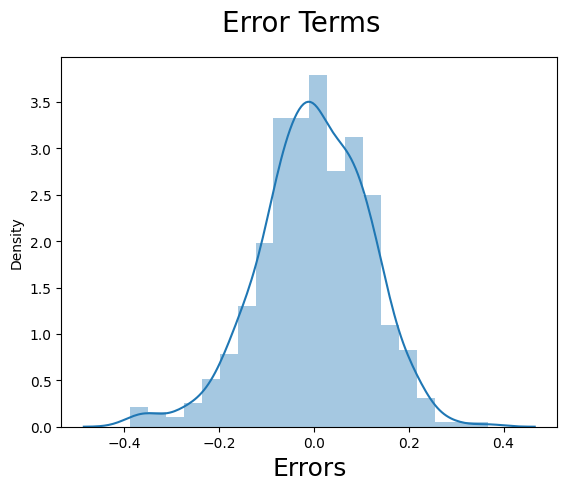

In [552]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

##### We see the error terms have normalised behaviour centered at 0.0. Sum of all residual errors is zero.

## Step 7: Testing the data

In [553]:
# First we apply scaling on the test set
nondummy_nonbool_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
# This time we transform only and do not fit, instead of we will use the min - max set by the trainind data using 'scaler'.

df_test[nondummy_nonbool_vars] = scaler.transform(df_test[nondummy_nonbool_vars])

In [554]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,LightSnowLRTSCLR,MistCRTSCLR
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,0.100457,...,0.264840,0.232877,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384,0.027397,0.319635
std,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,0.301297,...,0.442259,0.423633,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We now divide test set into X_test and y_test and thereafter use the trained model to do the prediction:

In [555]:
y_test = df_test.pop('cnt')
X_test = df_test

In [556]:
# Creating X_test_new dataframe using the X_train_new columns
X_test_new = X_test[X_train_new.columns]

# Adding the constant variable 
X_test_new = sm.add_constant(X_test_new)

In [557]:
# We do the prediction now:
y_test_pred = lm.predict(X_test_new)

### Let's now do the model evaluation:

Text(0, 0.5, 'y_pred')

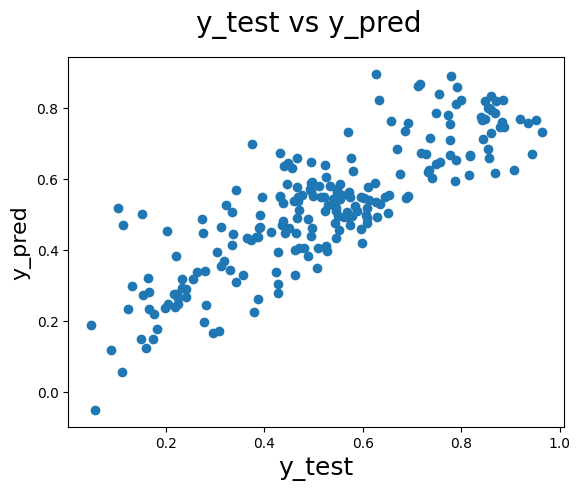

In [558]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                          

### Above spread looks almost linear

### Let's check the error term for test data prediction:

Text(0.5, 0, 'Errors')

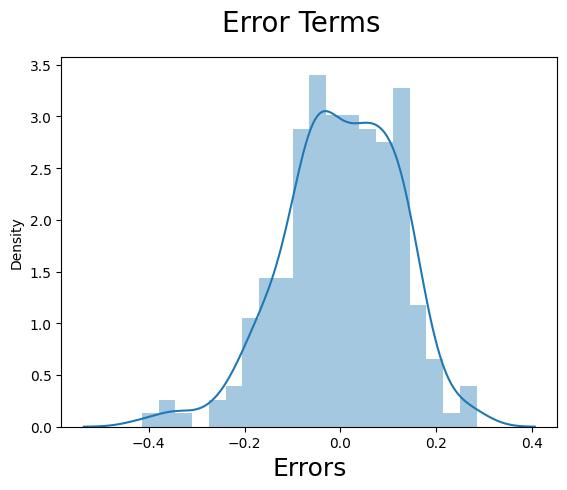

In [559]:
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   

### We see the error terms are also almost normal for tes data predictions, hence our model created with following variables is good enough to describe the bike demands.
- workingday
- atemp
- windspeed
- data of 'yr' - 2019 only on sundays with weathersit = 3 i.e Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

By looking at the coefficients of these variables the top 3 contributers having the significance on the prediction of count of bikers are:
1. atemp - it has highest positive correlation with target variable
2. yr - The yr value - 2019 has second highest positive correlation with the target variable
3. weathersit - The value 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds' has highest negative correlation with the target variable